## Data Investigation on Titanic
### Report Outline 
 1. Introduction
 2. Proposed Questions
 3. Data Wrangling 
 4. Data Exploration 
 5. Further Exploration
 6. Conclusion
 7. Reference Links

### 1. Introduction 

- The Titanic Dataset is selected to perform the investigation from Kaggle. 
- The structure of this report is basically following the Udacity rubric. 
- The questions are proposed in Proposed Question (section 2). 
- The file-io, cleanning missing value, and ..etc are addressed in Data Wrangling(section 3).
- The data exploration & hypothesis test with questions are discussed in Data Exploration(section 4).
- More exploration and data exploration is in (section 5)

### 2. Proposed Questions
- Which Age group had a better chance of survival ?
- Which Social class had a better chance of survival?
- Which Gender had a better chance of survival ?


### 3. Data Wrangling Phase
- This section mainly contains the code implementation with 
    - Handling csv file-io
    - Check the data quality with missing value
    - Select the targeted data
    - Drop the null value
    - Feature engineering(part-1) of assign the index to the Sex feature.
    - Feature engineering(part-2) of discretize the Age feature.
- The statistical explorations would be on the next section.
- According to the proposed questions, we are going to explore the dataset that contains Age, Social, Gender and Survival.

In [31]:
# import data process tools
import numpy as np
import pandas as pd
from scipy import stats
from IPython.display import display 

# import visualization tools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

###############
# CSV File IO #
###############

# read raw data from csv file
try :
    df_raw = pd.read_csv('titanic_data.csv')
except:
    print 'Missing file : [titanic_data.csv]'

# Inspect the column 
display(df_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


None

In [249]:
#######################
# Missing Value Check #
#######################
memo = {}
for col in df_raw.columns:
    memo[col] = probe_null_number(df_raw, col)
memo=pd.DataFrame([memo])
print 'Missing Value Probe'
display(memo)

Missing Value Probe


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,177,687,2,0,0,0,0,0,0,0,0,0


In [250]:
###############
# Select Data #
###############

# According to the proposed question select related variables
select_vars = ['Survived','Pclass', 'Sex', 'Age']
    
# drop other variables/features 
df_select = df_raw.loc[:,select_vars]

# fill out NA 
df_dropna = df_select.dropna().reindex()

# display the target dataset 10 raws for visual-check
display(df_dropna.ix[:10,:])

print 'The raw data is with {} rows of records'.format(len(df_raw))
print 'The data we explore is with {} rows of records'.format(len(df_feature2))

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
6,0,1,male,54.0
7,0,3,male,2.0
8,1,3,female,27.0
9,1,2,female,14.0
10,1,3,female,4.0


The raw data is with 891 rows of records
The data we explore is with 714 rows of records


In [253]:
#########################
# Feature Engineering 1 #
#########################
# since the Sex is contrian the str object. 
# we endoded as male = 1 and female = 0

def numerize_Sex(x):
    if x=='male':
        return 1
    return 0

# Copy for manipulation 
df_numerize_Sex = df_dropna.copy()

# apply the function on the sex feature
df_numerize_Sex['Sex'] = df_numerize_Sex['Sex'].apply(numerize_Sex)

# Visualize # display the target dataset 5 raws for visual-check
print ('Change Sex feature into 0 and 1 ')
display(df_numerize_Sex.ix[:5,:])

#########################
# Feature Engineering 2 #
#########################
# We also notice that Age features seems to be continuous, 
# We could decretize it into the categorical features 
# by with the help of histogram and bin-size


# Copy for manipulation 
df_feature2 = df_numerize_Sex.copy()

# Define a function for descretizaton 
# 0~10   => 0
# 11~20 => 1
# 21~30 => 2
# 31~40 => 3
# .... etc 


# Apply the lamba function for descretizaton
df_feature2['Age'] = df_feature2['Age'].apply(lambda x: int((x+1) /10.0))

print ('Change Age feature into 0 to 10 catagories')
display(df_feature2.ix[:5,:])


Change Sex feature into 0 and 1 


,Survived,Pclass,Sex,Age
0,0,3,1,22.0
1,1,1,0,38.0
2,1,3,0,26.0
3,1,1,0,35.0
4,0,3,1,35.0


Change Age feature into 0 to 10 catagories


,Survived,Pclass,Sex,Age
0,0,3,1,2
1,1,1,0,3
2,1,3,0,2
3,1,1,0,3
4,0,3,1,3


### 4. Data Exploration with Hypothesis Test
- In this section, we are going to first explore the basic information about the target dataset. Then we are going to use the hypothesis test to judge whether the Age, Social-class or Gender would contributed to Survials or not.

#### Basic Information 
- Data Type : Categorical Data
- Hypothesis Test Method : Use Chi-square of independent test.
- Alpha-level = 0.05 

#### Hypothesis-1 
- Null : Age does not contribute to the chance of Survials.
- Alternative Hypothesis : It contributes to the chance of Survials.


#### Hypothesis-2 
- Null : Social(Pclass) does not contribute to the chance of Survials.
- Alternative : It contributes to the chance of Survials.
 

#### Hypothesis-3 
- Null : Gender(Sex) does not contribute to the chance of Survials.
- Alternative : It contributes to the chance of Survials.

In [255]:
from scipy.stats import chi2_contingency

def chi_test(df, colName):
    assert type(colName)==str
    print '--------------------------------'
    
    # create contengency table 
    df_analyse = pd.crosstab(df[colName], df['Survived']).T
    
    # Visulizatoin 
    display(df_analyse)
    
    # Use chi2_contingency test of independent 
    chi2, p, dof, expected = chi2_contingency(df_analyse)
    print 'P-value : [{}] for {} vs Survived'.format(round(p,5),colName)

for featureName in ['Pclass', 'Sex', 'Age']:
    chi_test(df_feature2, featureName)

--------------------------------


Pclass,1,2,3
Survived,,,
0,64,90,270
1,122,83,85


P-value : [0.0] for Pclass vs Survived
--------------------------------


Sex,0,1
Survived,,
0,64,360
1,197,93


P-value : [0.0] for Sex vs Survived
--------------------------------


Age,0,1,2,3,4,5,6,7,8
Survived,,,,,,,,,
0,18,51,147,97,62,28,15,6,0
1,36,34,78,76,35,24,6,0,1


P-value : [0.00055] for Age vs Survived


###  Test Result 
##### Hypothesis-1 Discussion
- Null : Age does not contribute to the chance of Survials.
- Alternative Hypothesis : It contributes to the chance of Survials.
- Accordinig to the following Chi-square of independent test, the p-value is less than 0.05. (p=0). 
- The Alternative Hypothesis is faver. 

##### Hypothesis-2 Discussion
- Null : Social(Pclass) does not contribute to the chance of Survials.
- Alternative : It contributes to the chance of Survials.
- Accordinig to the following Chi-square of independent test, the p-value is less than 0.05. (p=0). 
- The Alternative Hypothesis is faver.  

##### Hypothesis-3 Discussion
- Null : Gender(Sex) does not contribute to the chance of Survials.
- Alternative : It contributes to the chance of Survials.
- Accordinig to the following Chi-square of independent test, the p-value is less than 0.05. (p=0). 
- The Alternative Hypothesis is faver. 

### 5. Further Exploration

##### Visualization and Descirption 
Since all these 3 variables are statistically significant, we are intersting how each variable affects the survived rate. From figure 5-1 to 5-4, we visualized with the survived propotion in each categories of each variable. 

We find that ... 
- Female is more likely to survive than Male.
- Pclas = 1 is more likely to survice than other Pclass.
- There is no obvious category that is more likely to survive in Age.

-----------------------
      Figure 5-1       
-----------------------


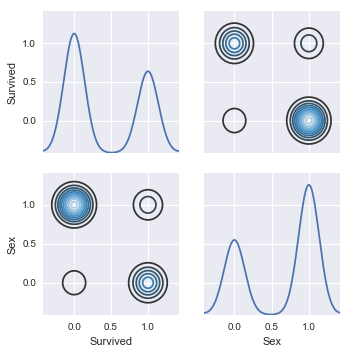

In [234]:
# Visulization Sex vs Survived
print '-----------------------'
print '      Figure 5-1       '
print '-----------------------'
g = sns.PairGrid(df_feature2.drop(['Age','Pclass'],1))
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d");

-----------------------
      Figure 5-2       
-----------------------


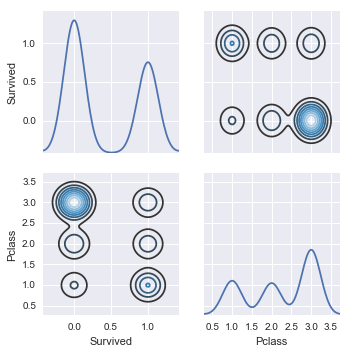

In [257]:
# Visulization Pclass vs Survived
print '-----------------------'
print '      Figure 5-2       '
print '-----------------------'
g = sns.PairGrid(df_feature2.drop(['Age','Sex'],1))
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d");

-----------------------
      Figure 5-3       
-----------------------


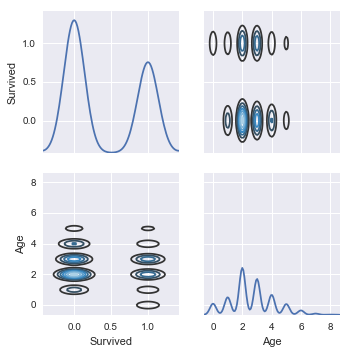

In [236]:
# Visulization of Age vs Survived
print '-----------------------'
print '      Figure 5-3       '
print '-----------------------'
g = sns.PairGrid(df_feature2.drop(['Sex','Pclass'],1))
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d");

-----------------------
      Figure 5-4       
-----------------------


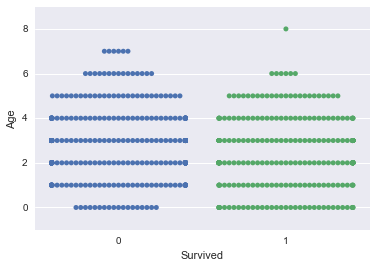

In [237]:
# Visulization of Age vs Survived in another way
print '-----------------------'
print '      Figure 5-4       '
print '-----------------------'
sns.swarmplot(x="Survived", y="Age", data=df_feature2.drop(['Sex','Pclass'],1));

-----------------------
      Figure 5-5       
-----------------------


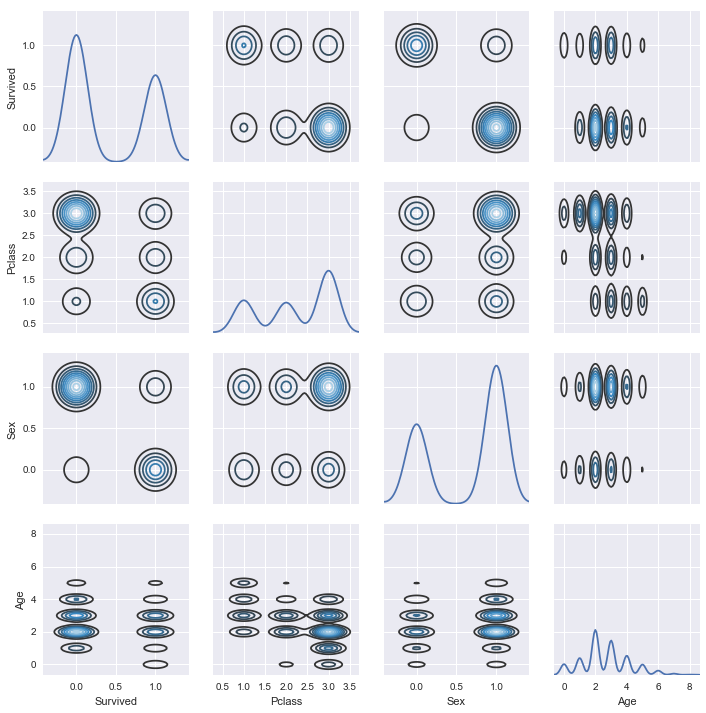

In [238]:
# Visulization of Pairwise 
print '-----------------------'
print '      Figure 5-5       '
print '-----------------------'
g = sns.PairGrid(df_feature2)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d");

In [256]:
#########################################
# More Chi-squr Test on other variables #
#########################################


df_all_dropna = df_raw.dropna().reindex()

def probe_null_number(df, colName):
    # return is null counts
    return len(df[colName][df[colName].isnull()]) 

# g = sns.pairplot(data =memo, kind="bar")
def chi_test_2(df, colName):
    assert type(colName)==str
    # create contengency table 
    df_analyse = pd.crosstab(df[colName], df['Survived']).T
    
    # Use chi2_contingency test of independent 
    chi2, p, dof, expected = chi2_contingency(df_analyse)
    print '{} vs Survived'.format(colName)
    print 'P-value : [{}]'.format(round(p,5))
    print '----------------------------------------------'

    
# Spare the Cabin 
df_new_drop = df_raw.drop(['Cabin'],1)

# dropna
df_new_drop = df_new_drop.dropna().reindex()


# Pairwisely check the chi-square 
for featureName in df_new_drop.columns:
    # we spared the PassengerId, Name since it is cooresponding to each record.
    if featureName in ['Survived','PassengerId', 'Name', 'Age','Pclass','Sex' ]:
        continue
    chi_test_2(df_new_drop, featureName)


SibSp vs Survived
P-value : [0.00043]
----------------------------------------------
Parch vs Survived
P-value : [7e-05]
----------------------------------------------
Ticket vs Survived
P-value : [0.02251]
----------------------------------------------
Fare vs Survived
P-value : [0.0]
----------------------------------------------
Embarked vs Survived
P-value : [0.0]
----------------------------------------------


### 6. Conclusion

- Basically, we found that different [Age, Sex , Pclass] would significantly affect the survive rate. 

- From above visualizatoion We could suggest that Female is more likely to survive than Male and Pclas = 1 is more likely to survice than other Pclass. 

- However, we are not able to see the obvious category that is more likely to survive in Age, even we think it might be significantly affect the survived rate. 

- Further, we only check and test the hypothesis of the correlation of [Age, Sex , Pclass] to [Survived]. From the figure 5-5, we could see that there might be more correlations with each other.
Since, we didn't test and check the hypothesis of this pairwise comparison, we are not sure about whether it is significant or not.   

- Finally, we just select the feature by interest. From the more exploration in section 5, it is clear that there are more features that affect the survived rate significantly. 


### 7. Reference

- https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic
- https://www.kaggle.com/mrisdal/titanic/exploring-survival-on-the-titanic
- https://www.kaggle.io/svf/198371/166ea2e9c1074ca9cd2447c7ee27cf10/__results__.html#load-and-check-data
- http://stanford.edu/~mwaskom/software/seaborn/tutorial/distributions.html#visualizing-pairwise-relationships-in-a-dataset